# Imports and function definitions

In [1]:
# necessary imports
import nn_module as n
import math
import torch
from torch import Tensor
import matplotlib.pyplot as plt

import sys
if sys.version_info[0] == 3:
    from importlib import reload


In [2]:
torch.set_grad_enabled(False)

In [3]:
def generate_disc_set(nb):
    '''
    Generates the dataset
    parameters:
    nb   : Number of samples to be generated
    returns:
    input, target   : The input data and target label
    '''
    input = Tensor(nb, 2).uniform_(-1, 1)
    target = input.pow(2).sum(1).sub(2 / math.pi).sign().add(1).div(2).view(nb,1)
    return input, target

In [4]:
# generate the datasets (train and test)
train_input, train_target = generate_disc_set(1000)
test_input, test_target = generate_disc_set(1000)

In [5]:
%%capture
# normalize the inputs
mean, std = train_input.mean(), train_input.std()
train_input.sub_(mean).div_(std)
test_input.sub_(mean).div_(std)

# create class labels (2 dimensional output)
train_target = torch.cat((train_target, 1-train_target), dim=1)
test_target = torch.cat((test_target, 1-test_target), dim=1)

In [6]:
def plot_result(points, labels, title = None, ax = plt):
    '''
    plot the points with their labels
    '''
    labels = labels.view(-1,1)
    # use labels==labels+1 to create zero bytes
    mask1x = torch.cat((labels==1, labels==labels+1), 1)
    mask1y = torch.cat((labels==labels+1, labels==1), 1)
    mask0x = torch.cat((labels==0, labels==labels+1), 1)
    mask0y = torch.cat((labels==labels+1, labels==0), 1)
    ax.scatter(points[mask1x], points[mask1y], label = '1')
    ax.scatter(points[mask0x], points[mask0y], label = '0')
    ax.legend()
    if ax==plt:
        plt.title(title, {'fontsize':25})
    else:
        ax.set_title(title, fontsize = 25)


In [7]:
def errors(test_net, train_input, test_input, train_target, test_target):
    pred_train = torch.argmax(test_net.forward(train_input), dim = 1)
    pred_test = torch.argmax(test_net.forward(test_input), dim = 1)
    nbr_errors_train = 0
    nbr_errors_test = 0
    for i in range(1000):
        if pred_train[i].int() != train_target[i,1].int(): nbr_errors_train += 1
        if pred_test[i].int() != test_target[i,1].int(): nbr_errors_test += 1
    print('Final training error: {}%'.format(nbr_errors_train/10))
    print('Final test error: {}%'.format(nbr_errors_test/10))
    
    train_loss = lossf.loss(test_net.forward(train_input), train_target).item()
    print('Final training set loss: {:.4f}'.format(train_loss))
    test_loss = lossf.loss(test_net.forward(test_input), test_target).item()
    print('Final test set loss: {:.4f}'.format(test_loss))

In [8]:
def plot_loss(losspath):
    plt.figure(figsize= (14,6))
    plt.plot(losspath)
    plt.title('Training Loss Path', {'fontsize':25})
    plt.xlabel('Epoch', {'fontsize':25})
    plt.ylabel('Loss', {'fontsize':25})
    plt.xticks([0, 5, 10, 15, 20],[0, 5, 10, 15, 20], fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [9]:
def compare_loss(losspath1, losspath2, losspath3, losspath4, losspath5):
    plt.figure(figsize= (14,6))
    plt.plot(losspath1, label = 'SGD')
    plt.plot(losspath2, label = 'batchSGD')
    plt.plot(losspath3, label = 'AdaGrad')
    plt.plot(losspath4, label = 'RMSProp')
    plt.plot(losspath5, label = 'Adam')
    plt.title('Training Loss Path', {'fontsize':25})
    plt.xlabel('Epoch', {'fontsize':25})
    plt.ylabel('Loss', {'fontsize':25})
    plt.xticks([0, 5, 10, 15, 20],[0, 5, 10, 15, 20], fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(prop={'size': 20})
    plt.show()

In [10]:
def compare_loss2(losspath1, losspath2, losspath3):
    plt.figure(figsize= (14,6))
    plt.plot(losspath1, label = 'SGD')
    plt.plot(losspath2, label = 'batch SGD, size 10')
    plt.plot(losspath3, label = 'batch SGD, size 20')
    plt.title('Training Loss Path', {'fontsize':25})
    plt.xlabel('Epoch', {'fontsize':25})
    plt.ylabel('Loss', {'fontsize':25})
    plt.xticks([0, 5, 10, 15, 20],[0, 5, 10, 15, 20], fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(prop={'size': 20})
    plt.show()

# Optimizer 1: SGD

In [11]:
# initialise the test network
test_net_SGD = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.SGD(test_net_SGD, lossf)
# train the model
SGD = optim.train(train_input, train_target, 20, 1e-2, test_input=test_input, test_target=test_target)

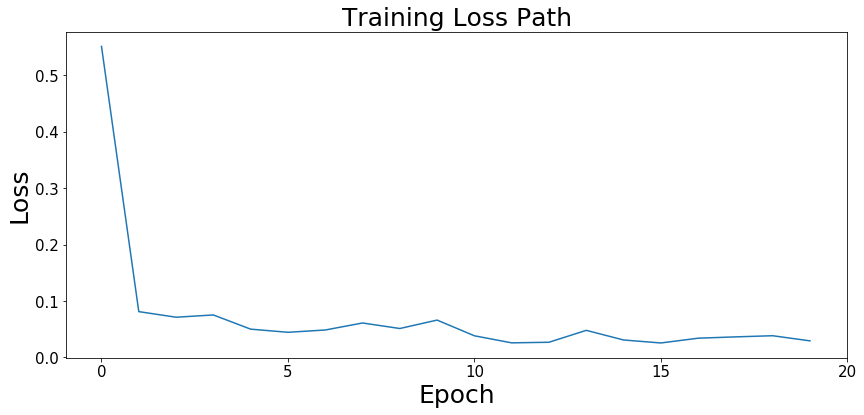

In [12]:
plot_loss(SGD[0])

In [13]:
errors(test_net_SGD, train_input, test_input, train_target, test_target)

Final training error: 6.6%
Final test error: 5.3%
Final training set loss: 0.0470
Final test set loss: 0.0434


In [14]:
# showcase parameter return function (returns dict of dicts)
test_net_SGD.param()

{'layer0': {'bias': tensor([[-0.4674, -0.7136, -0.3718, -0.5017, -0.3706, -0.6533, -0.7347, -0.4364,
           -0.2681, -0.3285, -0.2071, -0.1870, -0.0895, -0.5164, -0.5848, -0.3957,
           -0.2805, -0.0735, -0.6184, -0.3473, -0.6057,  0.1557, -0.0707, -0.3863,
           -0.4924]]),
  'weights': tensor([[-0.1152, -0.9858, -0.5825,  0.8336,  0.3768,  0.7424, -1.0231, -0.5374,
           -0.3091, -0.3833,  0.2523, -0.3114, -0.0443,  0.6743, -0.1922, -0.4730,
           -0.1930,  0.0675,  0.2710,  0.5820,  1.0125, -0.1124, -0.3275,  0.0557,
           -0.6743],
          [-0.7248,  0.3953,  0.0092, -0.4268, -0.5088,  0.8624, -1.0291,  0.8542,
            0.2322,  0.2713, -0.4791, -0.0255,  0.0216, -0.4820,  0.7910,  0.7374,
           -0.4253, -0.1752, -1.0602,  0.3254,  0.2810,  0.0275, -0.3476,  0.8573,
           -0.0119]])},
 'layer1': {'bias': tensor([[-0.2132, -0.6390, -0.5661, -0.0805, -0.0696, -0.4700, -0.1753, -0.9021,
           -0.4077, -0.2408, -0.5440, -0.1156, -0.1482,

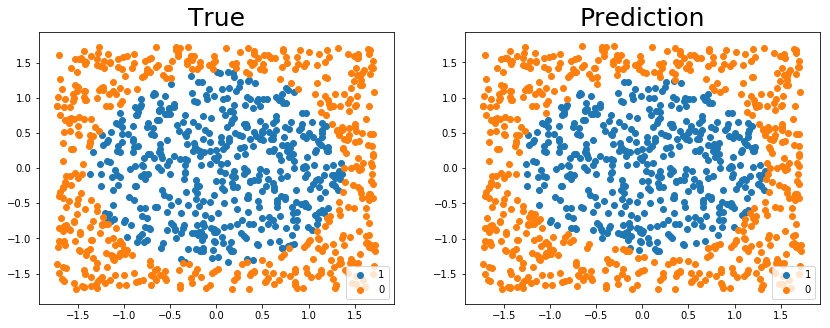

In [15]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_SGD.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

# Optimizer 2: batch SGD

### Batchsize = 5

In [16]:
# initialise the test network
test_net_batchSGD5 = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.batchSGD(test_net_batchSGD5, lossf, 5)
# train the model
batchSGD5 = optim.train(train_input, train_target, 20, 1e-2)

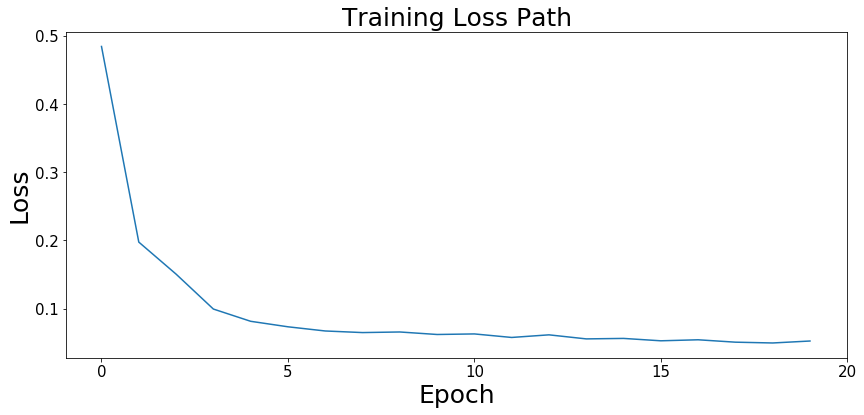

In [17]:
plot_loss(batchSGD5[0])

In [18]:
errors(test_net_batchSGD5, train_input, test_input, train_target, test_target)

Final training error: 2.7%
Final test error: 2.3%
Final training set loss: 0.0501
Final test set loss: 0.0442


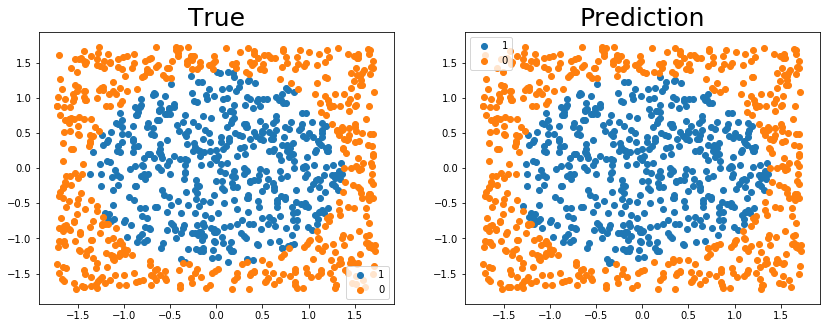

In [19]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_batchSGD5.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

### Batch size 10

In [20]:
# initialise the test network
test_net_batchSGD10 = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.batchSGD(test_net_batchSGD10, lossf, 5)
# train the model
batchSGD10 = optim.train(train_input, train_target, 20, 1e-2)

### Batch size 20

In [21]:
# initialise the test network
test_net_batchSGD20 = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.batchSGD(test_net_batchSGD20, lossf, 5)
# train the model
batchSGD20 = optim.train(train_input, train_target, 20, 1e-2)

# Optimizer 3: AdaGrad

In [22]:
# initialise the test network
test_net_ada = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.AdaGrad(test_net_ada, lossf, batchsize=10)
# train the model
ada = optim.train(train_input, train_target, 20, False)

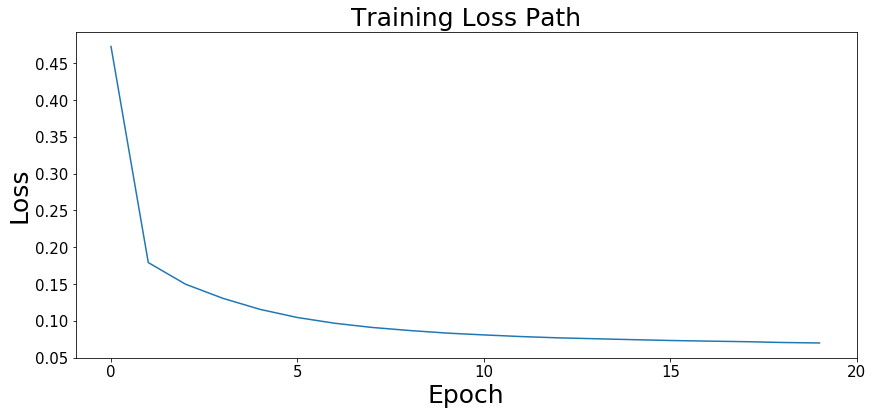

In [23]:
plot_loss(ada[0])

In [24]:
errors(test_net_ada, train_input, test_input, train_target, test_target)

Final training error: 3.8%
Final test error: 3.0%
Final training set loss: 0.0696
Final test set loss: 0.0667


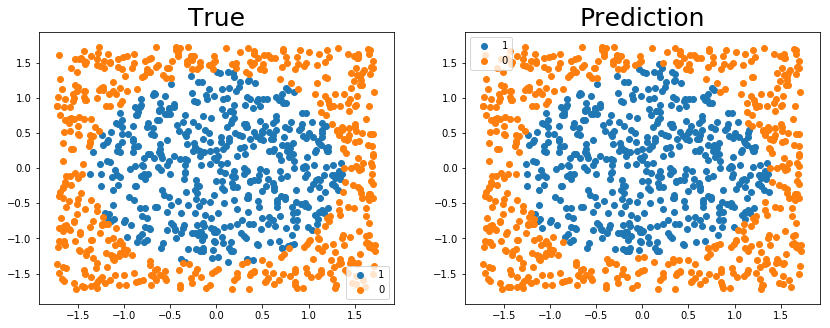

In [25]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_ada.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

# Optimizer 4: RMSProp

In [26]:
# initialise the test network
test_net_rmsp = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.RMSProp(test_net_rmsp, lossf, batchsize=10)
# train the model
rmsp = optim.train(train_input, train_target, 20, False)

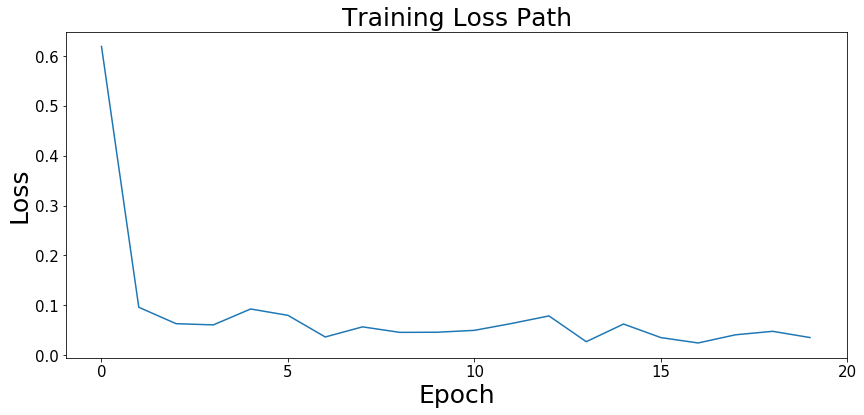

In [27]:
plot_loss(rmsp[0])

In [28]:
errors(test_net_rmsp, train_input, test_input, train_target, test_target)

Final training error: 3.7%
Final test error: 3.5%
Final training set loss: 0.0262
Final test set loss: 0.0289


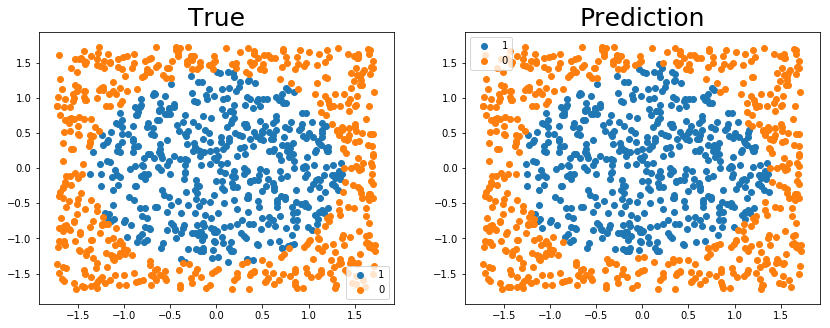

In [29]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_ada.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

# Optimizer 5: Adam

In [30]:
# initialise the test network
test_net_adam = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.Adam(test_net_adam, lossf, batchsize=10)
# train the model
adam = optim.train(train_input, train_target, 20, False)

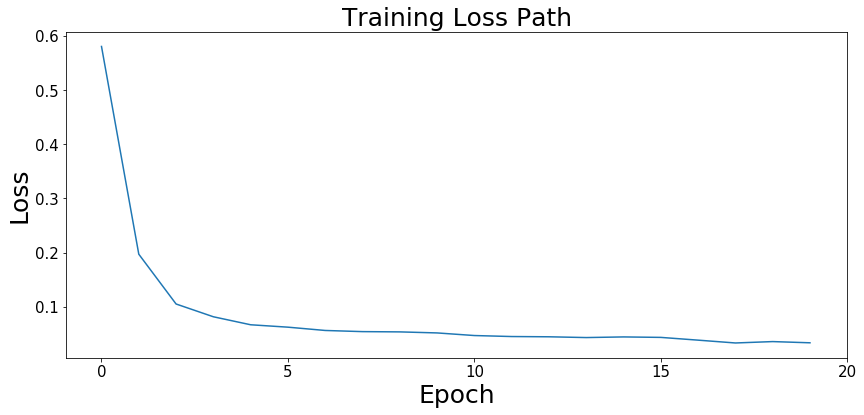

In [31]:
plot_loss(adam[0])

In [32]:
errors(test_net_adam, train_input, test_input, train_target, test_target)

Final training error: 5.5%
Final test error: 5.9%
Final training set loss: 0.0426
Final test set loss: 0.0450


# Plot of different Losspaths

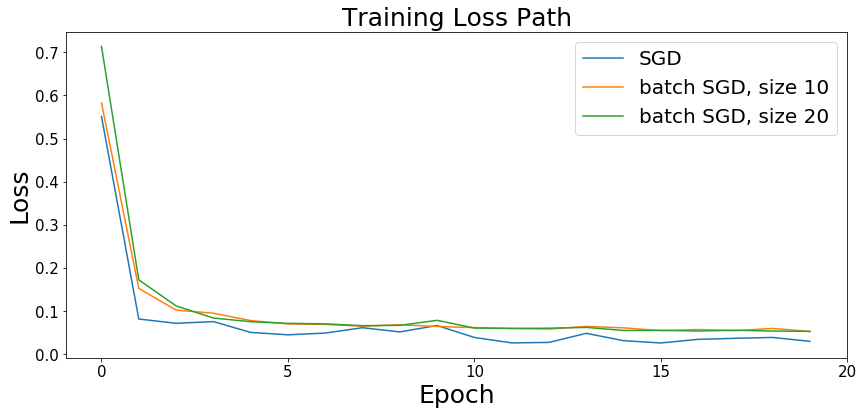

In [33]:
compare_loss2(SGD[0], batchSGD10[0], batchSGD20[0])

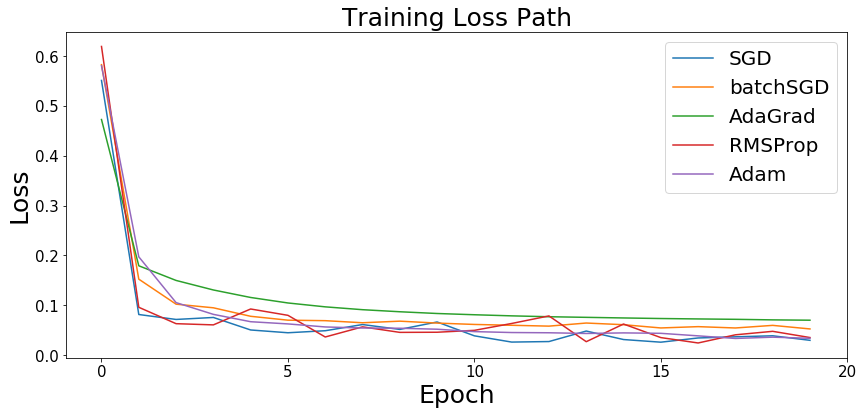

In [35]:
compare_loss(SGD[0], batchSGD10[0], ada[0], rmsp[0], adam[0])

# Cross-entropy loss

In [36]:
# initialise the test network
test_net_SGD_CE = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.CE()
optim = n.optimizers.SGD(test_net_SGD_CE, lossf)
# train the model
SGD_CE = optim.train(train_input, train_target, 20, 1e-2)

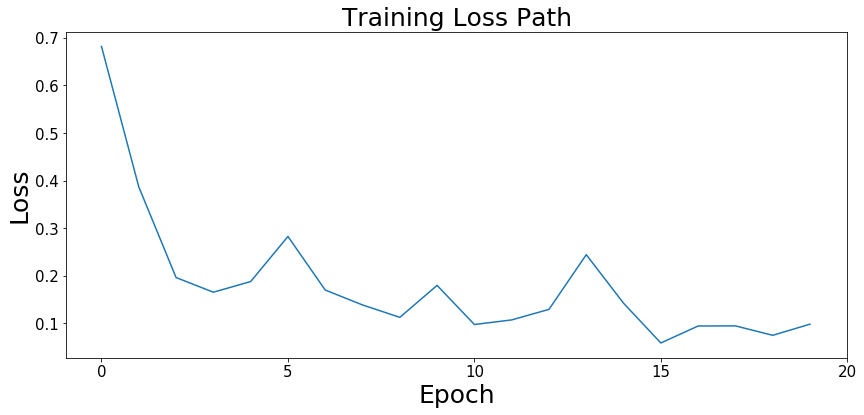

In [38]:
plot_loss(SGD_CE[0])

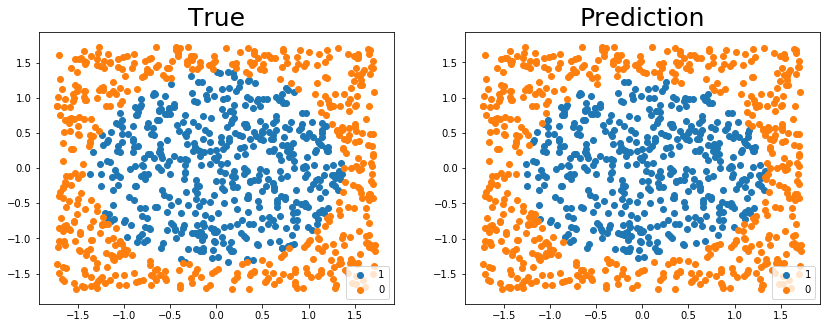

In [39]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_SGD_CE.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

In [40]:
errors(test_net_SGD_CE, train_input, test_input, train_target, test_target)

Final training error: 5.0%
Final test error: 4.4%
Final training set loss: 0.1138
Final test set loss: 0.0833


# Cross-entropy loss with batch-SGD

In [41]:
# initialise the test network
test_net_bSGD_CE = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.CE()
optim = n.optimizers.batchSGD(test_net_bSGD_CE, lossf, 10)
# train the model
bSGD_CE = optim.train(train_input, train_target, 50, 1e-2)

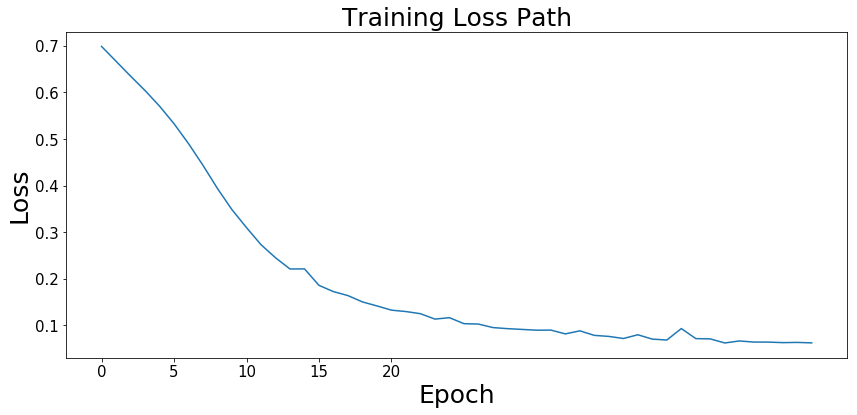

In [42]:
plot_loss(bSGD_CE[0])

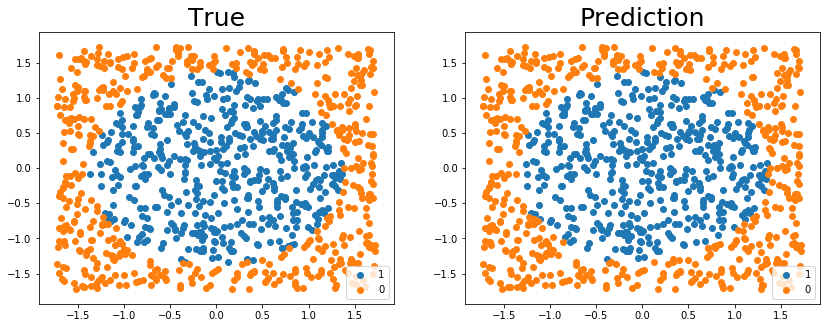

In [43]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_bSGD_CE.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

In [44]:
errors(test_net_bSGD_CE, train_input, test_input, train_target, test_target)

Final training error: 1.4%
Final test error: 2.1%
Final training set loss: 0.0570
Final test set loss: 0.0567


# Cross-entropy loss with dropout layers

In [45]:
# initialise the test network
test_net_SGD_CE_DO = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.dropout(0.3),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.dropout(0.3),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.dropout(0.3),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.CE()
optim = n.optimizers.SGD(test_net_SGD_CE_DO, lossf)
# train the model
SGD_CE_DO = optim.train(train_input, train_target, 20, 1e-2)

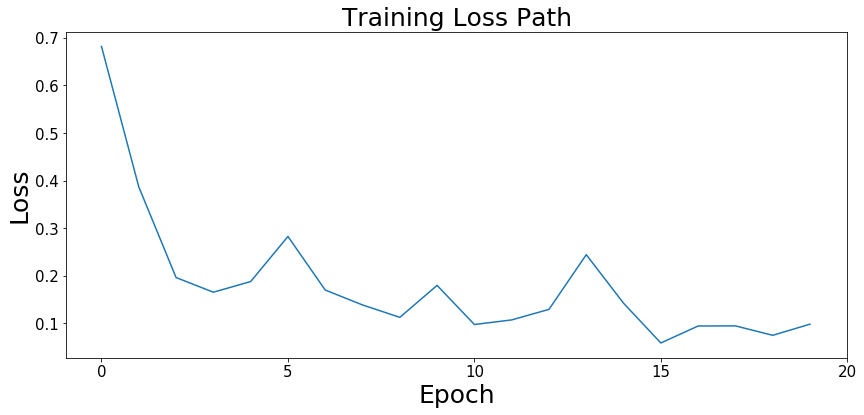

In [46]:
plot_loss(SGD_CE[0])

Switching training mode to False for all layers...


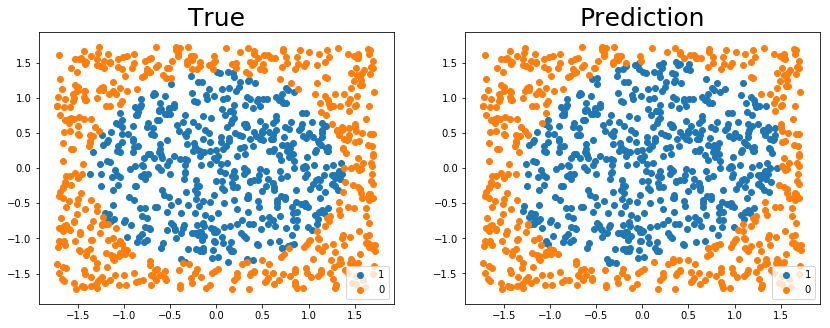

In [47]:
# plot the test set performance
test_net_SGD_CE_DO.set_training_mode(False)
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_SGD_CE_DO.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

In [48]:
errors(test_net_SGD_CE_DO, train_input, test_input, train_target, test_target)

Final training error: 7.2%
Final test error: 7.9%
Final training set loss: 0.1716
Final test set loss: 0.1713
